In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\elevvo internship\Task 7\train.csv")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### **Convert Date and Aggregate Monthly**

In [11]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate weekly sales to monthly (sum)
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


C:\Users\Hp\AppData\Local\Temp\ipykernel_25204\2876802705.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Weekly_Sales'].sum()


### **Overall Monthly Trend**

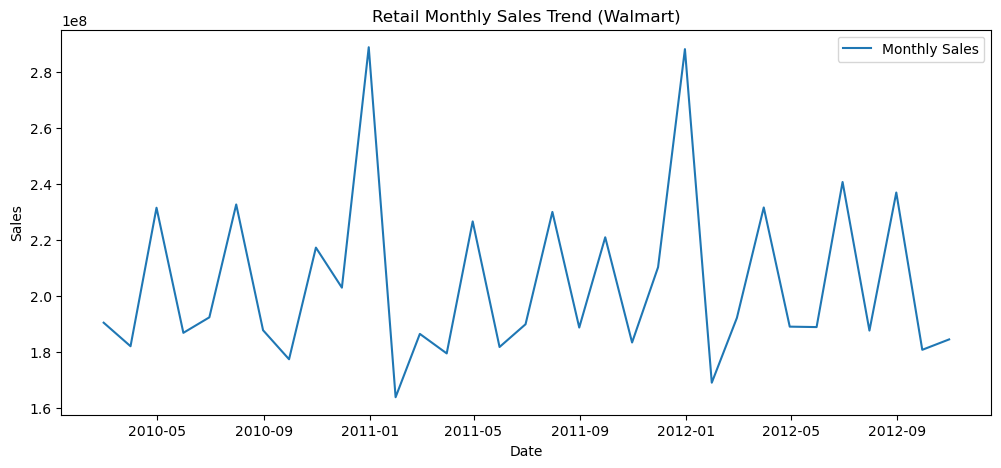

In [12]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Retail Monthly Sales Trend (Walmart)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### **Moving Averages (Trend Smoothing)**

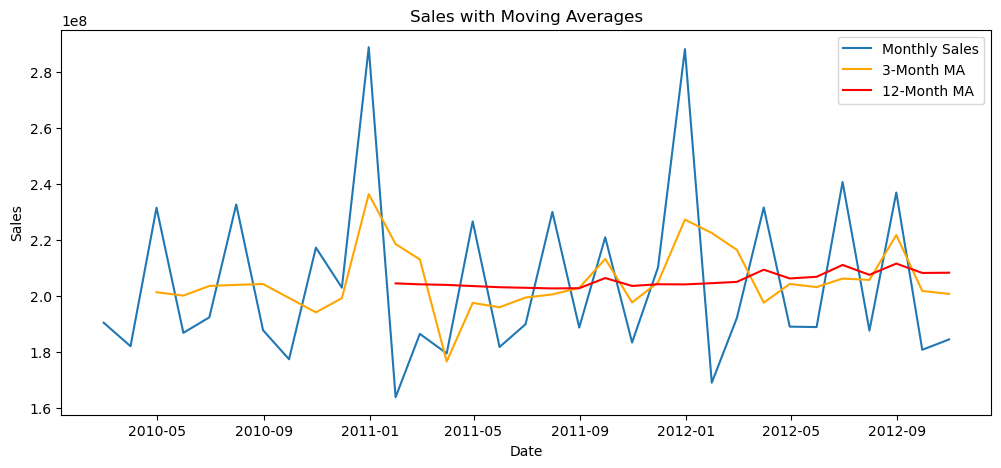

In [13]:
ma3 = monthly_sales.rolling(window=3).mean()
ma12 = monthly_sales.rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(ma3, label='3-Month MA', color='orange')
plt.plot(ma12, label='12-Month MA', color='red')
plt.title('Sales with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### **Seasonality Pattern by Month**

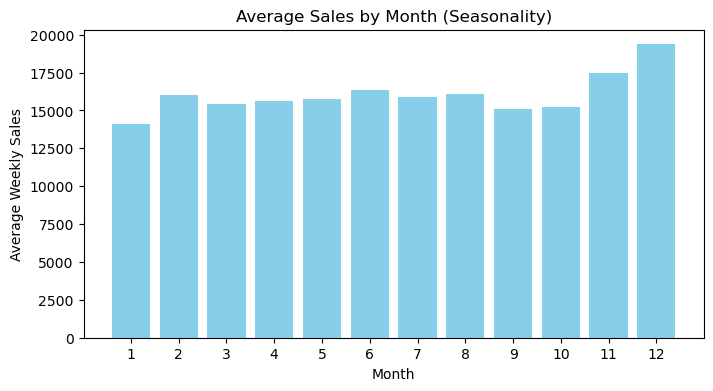

In [14]:
df['Month'] = df['Date'].dt.month
seasonal_pattern = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(8,4))
plt.bar(seasonal_pattern.index, seasonal_pattern.values, color='skyblue')
plt.title('Average Sales by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1,13))
plt.show()


### **Breakdown by Store (Region)**

C:\Users\Hp\AppData\Local\Temp\ipykernel_25204\3125567559.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df.groupby([pd.Grouper(key='Date', freq='M'), 'Store'])['Weekly_Sales'].sum().unstack()


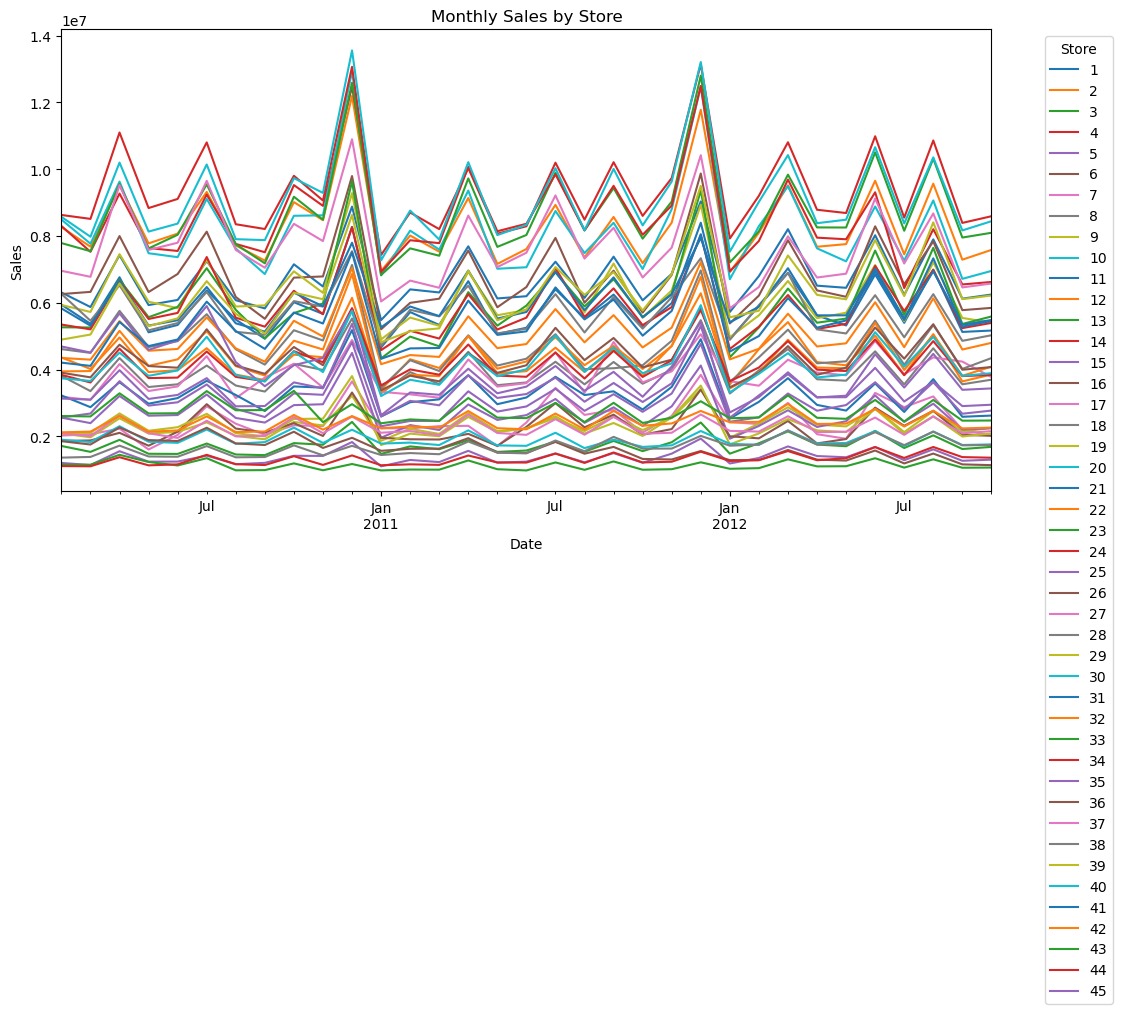

In [15]:
store_sales = df.groupby([pd.Grouper(key='Date', freq='M'), 'Store'])['Weekly_Sales'].sum().unstack()

store_sales.plot(figsize=(12,6))
plt.title('Monthly Sales by Store')
plt.ylabel('Sales')
plt.legend(title='Store', bbox_to_anchor=(1.05,1))
plt.show()


### **Bonus Forecasting (Rolling Mean)**

C:\Users\Hp\AppData\Local\Temp\ipykernel_25204\2459129469.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')


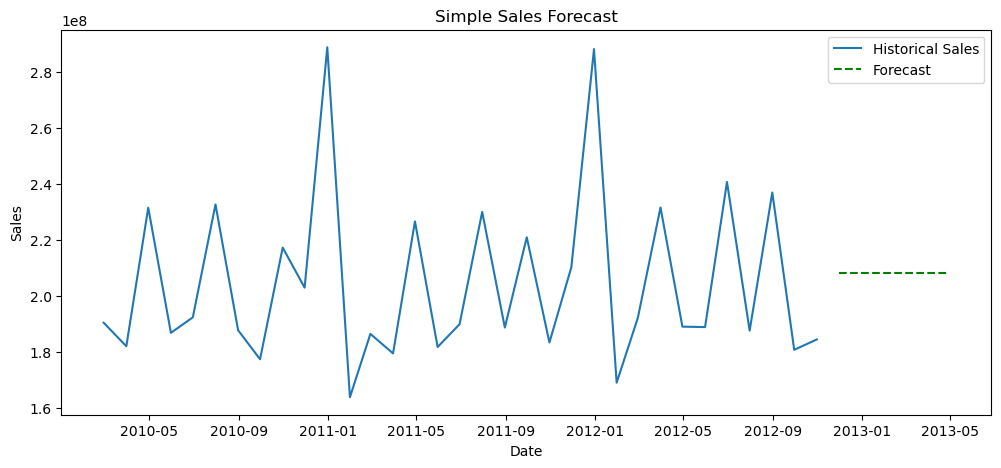

In [16]:
forecast_periods = 6  # forecast next 6 months
last_12_avg = monthly_sales.tail(12).mean()
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')
forecast_series = pd.Series([last_12_avg]*forecast_periods, index=forecast_index)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_series, label='Forecast', color='green', linestyle='--')
plt.title('Simple Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
